# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

from IPython.display import YouTubeVideo

Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../00-liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selecting previously unselected package libgflags2.2.
Preparing to unpack .../01-libgflags2.2_2.2.2-2_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-2) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../02-libgflags-dev_2.2.2-2_amd64.deb ...
Unpacking libgflags-dev (2.2.2-2) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../03-libgoogle-glog0v5_0.5.0+really0.4.0-2_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.5.0+really0.4.0-2) ...
Selecting previously unselected package libunwind-dev:amd64.
Preparing to unpack .../04-libunwind-dev_1.3.2-2build2.1_amd64.deb ...
Unpacking libunwind-dev:amd64 (1.3.2-2build2.1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to un

## Detect poses on a test video

We are going to detect poses on the following youtube video:

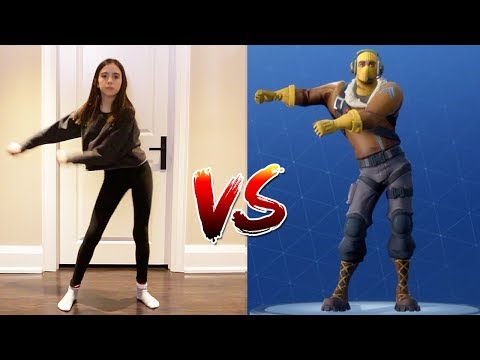

In [20]:
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [49]:
# ! pip install -U yt-dlp
#!rm -rf youtube.mp4
# download the youtube with the given ID
#!yt-dlp -f "bestvideo[ext=mp4]+bestaudio[ext=m4a]" --merge-output-format mp4 -o "youtube.%(ext)s" "https://www.youtube.com/watch?v=rTHlyTphWP0&index=6&list=PLjeDyYvG6-40qawYNR4juzvSOg-ezZ2a6"
# cut the first 5 seconds

!wget https://github.com/CMU-Perceptual-Computing-Lab/openpose/raw/master/examples/media/video.avi -O openpose.avi


!ffmpeg -y -loglevel info -i youtube.mp4 -t 30 video.mp4
# # detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video openpose.avi
# # convert the result into MP4
!touch output.mp4
!ffmpeg -y -loglevel info -i openpose.avi 'content/output.mp4'

--2025-02-20 10:50:55--  https://github.com/CMU-Perceptual-Computing-Lab/openpose/raw/master/examples/media/video.avi
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CMU-Perceptual-Computing-Lab/openpose/master/examples/media/video.avi [following]
--2025-02-20 10:50:56--  https://raw.githubusercontent.com/CMU-Perceptual-Computing-Lab/openpose/master/examples/media/video.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1395096 (1.3M) [video/msvideo]
Saving to: ‘openpose.avi’

openpose.avi        100%[===================>]   1.33M  --.-KB/s    in 0.007s  

2025-02-20 10:50:56 (191 MB/s) - ‘

Finally, visualize the result:

In [47]:
# import io
# import base64
# from IPython.display import HTML

# file_path = os.path.abspath("output.mp4")
# print(f"Đường dẫn tuyệt đối: {file_path}")

# if os.path.exists(file_path):
#     print("File tồn tại!")
# else:
#     print("File không tồn tại!")

# # def show_local_mp4_video(file_name = "/content/video.mp4", width=640, height=480):
# #   "show local mp4 video"
# #   video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
# #   return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
# #                         <source src="data:video/mp4;base64,{2}" type="video/mp4" />
# #                       </video>'''.format(width, height, video_encoded.decode('ascii')))

# # show_local_mp4_video('output.mp4', width=960, height=720)

!ls -l | grep output.mp4